In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score , ShuffleSplit , GridSearchCV
from sklearn.linear_model import LinearRegression , Lasso
from sklearn.tree import DecisionTreeRegressor

In [2]:
mumbai = pd.read_csv("mumbai.csv")
mumbai.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,4850000,720,Kharghar,1,1,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,1,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
2,6700000,650,Kharghar,1,1,1,1,1,0,1,...,1,0,1,0,0,0,0,0,0,0
3,4500000,650,Kharghar,1,1,1,0,0,1,0,...,1,1,1,0,0,0,0,0,1,0
4,5000000,665,Kharghar,1,1,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0


In [3]:
mumbai.drop(columns=['Resale','MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', "Children'splayarea", 'LiftAvailable','BED', 
        'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV','DiningTable', 
        'Sofa', 'Wardrobe', 'Refrigerator'],inplace = True)

In [4]:
mumbai.head()

,Price,Area,Location,No. of Bedrooms
0,4850000,720,Kharghar,1
1,4500000,600,Kharghar,1
2,6700000,650,Kharghar,1
3,4500000,650,Kharghar,1
4,5000000,665,Kharghar,1


In [5]:
for col in mumbai.columns:
    print(f'{col}  :- {mumbai[col].unique()}')

Price  :- [  4850000   4500000   6700000   5000000  17000000  12500000  10500000
  15000000   8700000   9000000  11000000   9700000   8000000   8500000
   9300000   9900000   4200000  28000000  40000000  16000000   9500000
   7500000  13000000  13700000   7700000   6000000   6200000   6500000
   5200000   5500000  16500000  11399999  13500000  22500000   5700000
   4800000   4300000   5300000   4803000  15500000   9400000   5600000
  17500000  12000000  16600000   4900000  22000000  17800000  14000000
   7200000   7000000  10000000   6900000   8300000   5100000   5400000
  17100000  11800000   4100000  19000000  13600000   8600000   4700000
  16200000  13200000  11600000   2018000  65000000  45000000   2375000
  19500000   2000000   2500000   2250000   2700000  43500000   4760000
  18100000  23800000  21200000  36500000  23700000  21400000  18000000
  35300000  15300000  25000000  13899999  33500000  14500000  21600000
  27799999  27900000  81600000  38600000  60100000  31500000  37500

<AxesSubplot:>

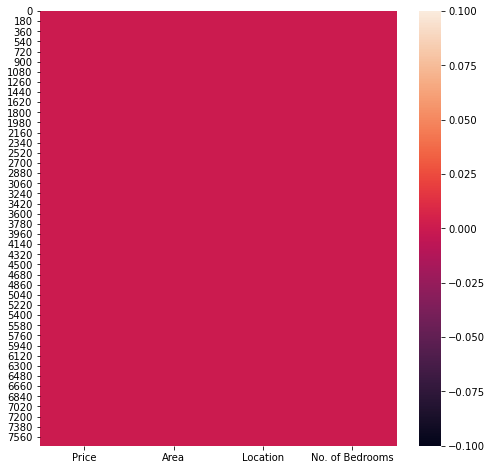

In [6]:
plt.figure(figsize=(8,8))
sns.heatmap(mumbai.isnull())

In [7]:
mumbai.dtypes

Price               int64
Area                int64
Location           object
No. of Bedrooms     int64
dtype: object

In [8]:
mumbai.Location.unique()

array(['Kharghar', 'Sector-13 Kharghar', 'Sector 18 Kharghar',
       'Sector 20 Kharghar', 'Sector 15 Kharghar', 'Dombivali',
       'Churchgate', 'Prabhadevi', 'Jogeshwari West', 'Kalyan East',
       'Malad East', 'Virar East', 'Virar', 'Malad West', 'Borivali East',
       'Mira Road East', 'Goregaon West', 'Kandivali West',
       'Borivali West', 'Kandivali East', 'Andheri East', 'Goregaon East',
       'Wadala', 'Ulwe', 'Dahisar', 'kandivali', 'Goregaon',
       'Bhandup West', 'thakur village kandivali east', 'Santacruz West',
       'Kanjurmarg', 'I C Colony', 'Dahisar W', 'Marol', 'Parel',
       'Lower Parel', 'Worli', 'Jogeshwari East', 'Chembur Shell Colony',
       'Central Avenue', 'Chembur East', 'Diamond Market Road', 'Mulund',
       'Nalasopara West', 'raheja vihar', 'Powai Lake', 'MHADA Colony 20',
       'Tolaram Colony', 'Taloja', 'Thane West', 'Vangani',
       'Sector 5 Ulwe', 'Sector12 New Panvel', 'Sector 17 Ulwe',
       'Sector9 Kamothe', 'Sector 19 Kharghar

In [9]:
mumbai.Location.value_counts()

Kharghar          681
Thane West        577
Mira Road East    481
Ulwe              391
Nala Sopara       225
                 ... 
Haji Ali            1
Wadi Bandar         1
worli sea face      1
Karave Nagar        1
Gulmohar Road       1
Name: Location, Length: 413, dtype: int64

In [10]:
len(mumbai.Location.unique())

413

In [11]:
location_stats = mumbai.groupby("Location")["Location"].agg("count")
location_stats

Location
15th Road                   1
4 Bunglows                  3
Adaigaon                    1
Agripada                    2
Airoli                     32
                           ..
vasant vihar thane west     4
vile parle west             8
vrindavan society           1
worli sea Fase              1
worli sea face              1
Name: Location, Length: 413, dtype: int64

In [12]:
location_stats_less_than_50 = location_stats[location_stats<=50]
location_stats_less_than_50

Location
15th Road                   1
4 Bunglows                  3
Adaigaon                    1
Agripada                    2
Airoli                     32
                           ..
vasant vihar thane west     4
vile parle west             8
vrindavan society           1
worli sea Fase              1
worli sea face              1
Name: Location, Length: 384, dtype: int64

In [13]:
len(location_stats_less_than_50)

384

In [14]:
mumbai.Location =mumbai.Location.apply(lambda x: "other" if x in location_stats_less_than_50 else x)

In [15]:
mumbai.Location.value_counts()

other               2544
Kharghar             681
Thane West           577
Mira Road East       481
Ulwe                 391
Nala Sopara          225
Borivali West        202
Kalyan West          197
Andheri West         189
Panvel               180
Powai                178
Malad West           176
Chembur              174
Kandivali East       168
Virar                137
Kandivali West       127
Kamothe              120
Goregaon West        100
Andheri East          95
Malad East            92
Mulund West           79
Dahisar               78
Boisar                78
Taloja                75
Ville Parle East      74
Goregaon East         72
Magathane             61
Naigaon East          61
Dombivali             56
Thane                 51
Name: Location, dtype: int64

In [16]:
len(mumbai.Location.unique())

30

In [17]:
#Now we have to change categorical data to numercial data
dummies = pd.get_dummies(mumbai.Location)
dummies.head()

,Andheri East,Andheri West,Boisar,Borivali West,Chembur,Dahisar,Dombivali,Goregaon East,Goregaon West,Kalyan West,...,Nala Sopara,Panvel,Powai,Taloja,Thane,Thane West,Ulwe,Ville Parle East,Virar,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
mumbai = pd.concat([mumbai.drop("Location",axis = "columns"),dummies.drop("other",axis="columns")],axis="columns")

In [19]:
mumbai.head()

,Price,Area,No. of Bedrooms,Andheri East,Andheri West,Boisar,Borivali West,Chembur,Dahisar,Dombivali,...,Naigaon East,Nala Sopara,Panvel,Powai,Taloja,Thane,Thane West,Ulwe,Ville Parle East,Virar
0,4850000,720,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4500000,600,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6700000,650,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4500000,650,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5000000,665,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
Mumbai_X = mumbai.drop(["Price"],axis=1)
Mumbai_X.head()

,Area,No. of Bedrooms,Andheri East,Andheri West,Boisar,Borivali West,Chembur,Dahisar,Dombivali,Goregaon East,...,Naigaon East,Nala Sopara,Panvel,Powai,Taloja,Thane,Thane West,Ulwe,Ville Parle East,Virar
0,720,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,600,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,650,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,650,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,665,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
Mumbai_Y = mumbai.Price
Mumbai_Y.head()

0    4850000
1    4500000
2    6700000
3    4500000
4    5000000
Name: Price, dtype: int64

### Building The Model Now

In [22]:
x_train, x_test , y_train , y_test = train_test_split(Mumbai_X,Mumbai_Y,test_size = 0.2,random_state = 10)

In [23]:
Cv = ShuffleSplit( n_splits=5,test_size=.2,random_state=1)

cross_val_score(LinearRegression(),Mumbai_X , Mumbai_Y , cv = Cv)

array([0.13804679, 0.10378578, 0.08306822, 0.11963913, 0.14904066])

In [24]:
def find_best_model_using_gridsearchcv(X , y):
    algos = {
        "linear_regression" : {
            "model": LinearRegression() , 
            "params" :{
                "normalize" : [True , False]
            }
    } , 
    "lasso" : {
        "model": Lasso(),
        "params":{
            "alpha":[1,2],
            "selection" : [ "random","cyclic"]
        }
    } ,
        
    "decision_tree":{
        "model": DecisionTreeRegressor(),
        "params" : {
            "criterion": ["mse","friedman_mse"],
            "splitter" : ["best","random"]
            }
        }    
    }
    
    scores=[]
    cv = ShuffleSplit(n_splits=10, test_size=0.2,random_state=0)
    for algo_name , config in algos.items():
        gs = GridSearchCV(config["model"] , config["params"] , cv = Cv , return_train_score=False )
        gs.fit(X , y)
        scores.append({
            "model" : algo_name,
            "best_score":gs.best_score_ , 
            "best_params": gs.best_params_
        })
        
        print("model" , algo_name,"best_score",gs.best_score_ , "best_params" , gs.best_params_)

    return pd.DataFrame(scores , columns=["model" , "best_score" , " best_params"])

In [25]:
find_best_model_using_gridsearchcv(x_train , y_train)

model linear_regression best_score 0.11360455243123573 best_params {'normalize': False}
model lasso best_score 0.11360474462741126 best_params {'alpha': 2, 'selection': 'cyclic'}
model decision_tree best_score -0.13205874549830982 best_params {'criterion': 'mse', 'splitter': 'random'}


,model,best_score,best_params
0,linear_regression,0.113605,NaN
1,lasso,0.113605,NaN
2,decision_tree,-0.132059,NaN


In [26]:
model = LinearRegression()

In [27]:
model.fit(x_train , y_train)

LinearRegression()

In [28]:
import json
columns = {
    "data_columns": [col.title() for col in Mumbai_X.columns]
}
with open("Mumbai_columns.json","w") as f:
    f.write(json.dumps(columns))

In [33]:
import joblib

In [34]:
with open('Mumbai_model_joblib','wb') as file:
    pickle.dump(model,file)

In [35]:
with open('Mumbai_model_joblib','rb') as file:
    mp = pickle.load(file)

In [36]:
mp.coef_

array([ 8.97096010e+03,  1.43415977e+06,  4.00385916e+05,  7.13451054e+06,
       -8.01948551e+06,  7.96079254e+05,  1.95593129e+06,  1.70376797e+06,
       -2.55425483e+06, -9.84399889e+05, -2.96716784e+06, -6.01309854e+06,
       -7.69993327e+06, -8.75264616e+05, -4.09153650e+05, -8.55871903e+06,
        1.62741557e+06, -4.79123999e+05,  1.79702232e+06, -4.76789383e+06,
       -1.23338040e+06, -4.67047802e+06, -6.87588607e+06, -9.30712393e+06,
       -9.62243767e+05, -8.57224909e+06, -7.62497443e+06, -2.68240835e+06,
       -6.40020901e+06,  8.30171189e+06, -8.05479940e+06])